In [1]:
# All the required modules installation

import numpy as np              # For numerical matrics
import pandas as pd             # For data processing
import os                       # For file handling
import cv2                      # For image processing
import tensorflow as tf         # For deep learing model
import matplotlib.pyplot as plt # For visualization
import seaborn as sns           # For visualisation
from tqdm import tqdm           # For file handling

In [64]:
# Label assinging to imageset

class_names = ['employee', 'person']
class_name_labels = {class_name : i for i, class_name in enumerate(class_names)}
IMAGE_SIZE = (150, 150)
class_name_labels

{'employee': 0, 'person': 1}

In [65]:
# Loading data

paths = [r"C:\Users\Manoj\Desktop\FynnL\archive (1)\_train", r"C:\Users\Manoj\Desktop\FynnL\archive (1)\_test"]

In [66]:
def load_data(paths):
    output = []
    
    #Iterating through Train & Test Data Set.
    for path in paths:
        
        images = []
        labels = []
        
        print("Loading Started for ",path)
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(path):
            label = class_name_labels[folder]
            
            # Iterate through each image in our folder
            # Assigns label for each image
            for file in tqdm(os.listdir(os.path.join(path, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(path, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [67]:
# Loading data

(train_images, train_labels), (test_images, test_labels) = load_data(paths)

Loading Started for  C:\Users\Manoj\Desktop\FynnL\archive (1)\_train


100%|████████████████████████████████████████████████████████████████████████████████| 838/838 [00:15<00:00, 53.26it/s]


Loading Started for  C:\Users\Manoj\Desktop\FynnL\archive (1)\_test


100%|████████████████████████████████████████████████████████████████████████████████| 148/148 [00:02<00:00, 55.76it/s]


In [68]:
# converting each image to grascale

train_images = train_images / 255.0 
test_images = test_images / 255.0

In [69]:
# Model creation

model_scratch = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(84, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.sigmoid)
])

In [70]:
# Complete analysis of created model

model_scratch.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 41472)             0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [71]:
# Initializing created model

model_scratch.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [72]:
# Fitting model with training imageset

history = model_scratch.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split = 0.15)

Epoch 1/10
6/6 [==============================] - 36s 6s/step - loss: 0.2722 - accuracy: 0.8571 - val_loss: 4.2550e-05 - val_accuracy: 1.0000
Epoch 2/10
6/6 [==============================] - 28s 5s/step - loss: 0.1227 - accuracy: 0.9847 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 29s 5s/step - loss: 0.1037 - accuracy: 0.9847 - val_loss: 0.0471 - val_accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 29s 5s/step - loss: 0.0745 - accuracy: 0.9847 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 29s 5s/step - loss: 0.0479 - accuracy: 0.9847 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 30s 5s/step - loss: 0.0337 - accuracy: 0.9847 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 30s 5s/step - loss: 0.0395 - accuracy: 0.9847 - val_loss: 0.0369 - val_accuracy: 1.0000
Epoch 8/10
6/6 [==============

In [73]:
# accuarcy of the model on given imageset

test_loss = model_scratch.evaluate(test_images, test_labels)

5/5 [==============================] - 3s 413ms/step - loss: 0.0645 - accuracy: 0.9308


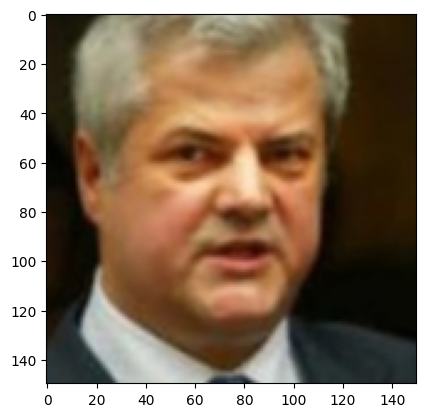

In [190]:
# LOading new image

image = cv2.imread(r"C:\Users\Manoj\Desktop\FynnL\archive (1)\_test\person\person_0083.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, IMAGE_SIZE)
plt.imshow(image)

In [191]:
# Converting loaded image to numerical values as machine understandable

evaluate_image = [image]
                
images = np.array(evaluate_image, dtype = 'float32')

In [192]:
# Predicting taken new image is under which category

model_scratch.predict(images)

1/1 [==============================] - 6s 6s/step


array([[0., 1.]], dtype=float32)

In [193]:
# Making label with most probable category

pred_labels = np.argmax(model_scratch.predict(images), axis = 1)

1/1 [==============================] - 0s 63ms/step


In [194]:
# Printing label

print(pred_labels)

[1]


In [195]:
# Showing label name fow new image

for class_name in class_name_labels:
    if class_name_labels[class_name] == pred_labels:
        print (class_name)

person


In [197]:
# Loading customer dataset

customer_data = pd.read_csv(r"C:\Users\Manoj\Desktop\FynnL\archive\Shopping_CustomerData.csv")

,CustomerID,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,Discount
0,1001,Male,49,Bengaluru,527547.58850,653,78,1
1,1002,Male,59,Bengaluru,207143.19760,630,63,1
2,1003,Female,54,Delhi,164423.84570,555,69,4
3,1004,Female,42,Bengaluru,56220.36443,699,30,1
4,1005,Female,30,Bengaluru,256194.36190,793,6,1


In [206]:
# Printing percentage of discount assigned to that particular person

target = customer_data[customer_data['CustomerID'] == 1196]
target['Discount']

195    4
Name: Discount, dtype: int64